# Expotary data Analysis for NLP 

In [32]:
import pandas as pd
import numpy as np
import os
import time
import json
import seaborn as sns

In [23]:
path_folder = r'F:\Specrom_Analysis\NLP\EDA_BBC_Data_textcallsi\bbc-fulltext\bbc'

# change the all directory in that folder to a dataframe to classfication task
directory,files,title,text,label = [],[],[],[],[]

for dir_name ,directory2 ,  files in os.walk(path_folder):
    for file in files:
        #directory.append(dir_name)
        #files.append(file)
        label.append(dir_name.split('\\')[-1]) #looks like this 'F:\\Specrom_Analysis\\NLP\\EDA_BBC_Data_textcallsi\\bbc-fulltext\\bbc\\politics',
        full_path = os.path.join(dir_name , file)
        #print(full_path)
        
        with open(full_path , 'r', encoding="utf8", errors='ignore') as f :
            text_con = ''
            firts_line = True
            for line in f:
                if firts_line:
                    title.append(line.replace('\n',''))
                    firts_line = False
                else:
                    text_con = text_con + ' ' + line.replace('\n','')
            text.append(text_con)
            
    print("Files extracted Successfully!!!!!!!!----->",file)
    
    
df = pd.DataFrame({'title':title , 'text' : text , 'label' : label})
print("DataFrame created !!!!")
df.to_csv(r"F:\Specrom_Analysis\NLP\EDA_BBC_Data_textcallsi\bbc-fulltext\bbc\bbc_news_data.csv")
print("csv file stored on the specified location")


Files extracted Successfully!!!!!!!!-----> README.TXT
Files extracted Successfully!!!!!!!!-----> 510.txt
Files extracted Successfully!!!!!!!!-----> 386.txt
Files extracted Successfully!!!!!!!!-----> 417.txt
Files extracted Successfully!!!!!!!!-----> 511.txt
Files extracted Successfully!!!!!!!!-----> 401.txt
DataFrame created !!!!
csv file stored on the specified location


In [28]:
data = pd.read_csv(r'F:\Specrom_Analysis\NLP\EDA_BBC_Data_textcallsi\bbc_news_data.csv',index_col =0)
data.head(10)

,title,text,label
0,Consists of 2225 documents from the BBC news w...,"Natural Classes: 5 (business, entertainment, ...",bbc
1,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarn...,business
2,Dollar gains on Greenspan speech,The dollar has hit its highest level against...,business
3,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yu...,business
4,High fuel prices hit BA's profits,British Airways has blamed high fuel prices ...,business
5,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dom...,business
6,Japan narrowly escapes recession,Japan's economy teetered on the brink of a t...,business
7,Jobs growth still slow in the US,The US created fewer jobs than expected in J...,business
8,India calls for fair trade rules,"India, which attends the G7 meeting of seven...",business
9,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cr...,business


In [31]:
data = data.drop(0,axis=0)
data.head(4)

,title,text,label
1,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarn...,business
2,Dollar gains on Greenspan speech,The dollar has hit its highest level against...,business
3,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yu...,business
4,High fuel prices hit BA's profits,British Airways has blamed high fuel prices ...,business


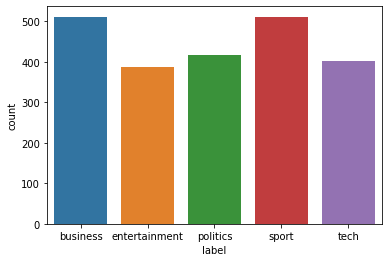

In [33]:
sns.countplot(data['label'])

In [36]:
data['label'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64

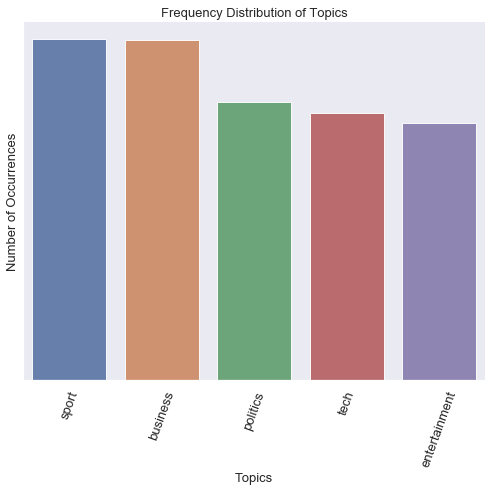

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.despine(right=True)

col_count_2 = data['label'].value_counts()
sns.set(style="darkgrid")

sns.barplot(col_count_2.index, col_count_2.values, alpha=0.9)

plt.title('Frequency Distribution of Topics', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Topics', fontsize=13)

plt.xticks(rotation=70, fontsize=13)

plt.setp(axes, yticks=[])

plt.tight_layout()
plt.show()

# Tokanization
converting the text(sentence) into words (tokens) and its frequencies is called...

In [41]:
from collections import Counter

text_freq = Counter()
#converting text to frequencies
for text in data['text']:
    t = text.split(' ')
    for token in t:
        text_freq[token]+=1
print(text_freq.most_common(20))
len(text_freq) # there are 64779 diffrent tokens 

[('the', 44432), ('to', 24460), ('of', 19756), ('and', 17867), ('a', 17115), ('in', 16316), ('', 13187), ('is', 8427), ('for', 8424), ('that', 7528), ('The', 7182), ('on', 7019), ('was', 5990), ('be', 5718), ('with', 5071), ('has', 4931), ('said', 4899), ('it', 4857), ('have', 4716), ('as', 4628)]


64779

In [43]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud

#creat a wordcloud plot that shows the word frequncies
cloud = WorldCloud(backgroud_color = 'white',).generate_from_frequencies(text_freq)
plt.imshow(cloud)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## Advanced tokenizers

In [50]:
#first use the tokenizer in the nltk library
from nltk.tokenize import TreebankWordTokenizer

sample = " Don't can't make it run ran running help to"
tokenizer = TreebankWordTokenizer()
result = tokenizer.tokenize(sample)
result

['Do', "n't", 'ca', "n't", 'make', 'it', 'run', 'ran', 'running', 'help', 'to']

In [51]:
# the spacy tokenizer works like the same
import spacy

ModuleNotFoundError: No module named 'spacy'